In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv("fifa_eda_stats.csv")


# Add 3 new features 
df["attacking_score"] = (df["Finishing"] + df["ShotPower"] + df["LongShots"]) / 3
df["defensive_score"] = (df["Marking"] + df["StandingTackle"] + df["SlidingTackle"]) / 3
df["physical_score"] = (df["Strength"] + df["Jumping"] + df["Stamina"]) / 3

df.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,attacking_score,defensive_score,physical_score
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,91.333333,29.000000,66.333333
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,94.000000,27.333333,87.333333
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,83.000000,28.000000,63.666667
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,18.666667,16.333333,58.000000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,88.000000,59.000000,76.000000


In [41]:
# Check for missing values

print("Before handling missing data:")
print(df.isnull().sum())


Before handling missing data:
ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve             

In [49]:

# Fill missing numeric columns with the mean
df = df.fillna(df.mean(numeric_only=True))

# Fill missing text columns with the most common value
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check again
print(df.isnull().sum())



ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpee

In [53]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Define the target column 
target = 'Overall'

# The three new features added during feature engineering
new_features = ['attacking_score', 'defensive_score', 'physical_score']

# Columns that are text or not useful for training the model
drop_cols = ['ID', 'Name', 'Nationality', 'Club', 'Preferred Foot', 
             'Work Rate', 'Body Type', 'Position', 'Joined', 
             'Loaned From', 'Contract Valid Until', 'Value', 'Wage', 'Release Clause']



In [55]:
# Select only numeric columns and remove the target column
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target]

# Prepare two versions of the dataset: before and after adding new features
X_before = df[numeric_cols].drop(columns=new_features, errors='ignore')
X_after = df[numeric_cols]
y = df[target]

# Split the data into training and testing sets 
Xb_train, Xb_test, y_train, y_test = train_test_split(X_before, y, test_size=0.2, random_state=42)
Xa_train, Xa_test, _, _ = train_test_split(X_after, y, test_size=0.2, random_state=42)


In [57]:
# Train Random Forest models on both versions of the dataset
model_before = RandomForestRegressor(random_state=42)
model_before.fit(Xb_train, y_train)

model_after = RandomForestRegressor(random_state=42)
model_after.fit(Xa_train, y_train)

# Predict on the test data
y_pred_before = model_before.predict(Xb_test)
y_pred_after = model_after.predict(Xa_test)

# Evaluate model performance using R² and Mean Squared Error
r2_before = r2_score(y_test, y_pred_before)
r2_after = r2_score(y_test, y_pred_after)
mse_before = mean_squared_error(y_test, y_pred_before)
mse_after = mean_squared_error(y_test, y_pred_after)

# Create a simple table to compare results
comparison = pd.DataFrame({
    'Model Version': ['Before Feature Engineering', 'After Feature Engineering'],
    'R² Score': [r2_before, r2_after],
    'Mean Squared Error': [mse_before, mse_after]
})

comparison

,Model Version,R² Score,Mean Squared Error
0,Before Feature Engineering,0.975843,1.123479
1,After Feature Engineering,0.977300,1.055724


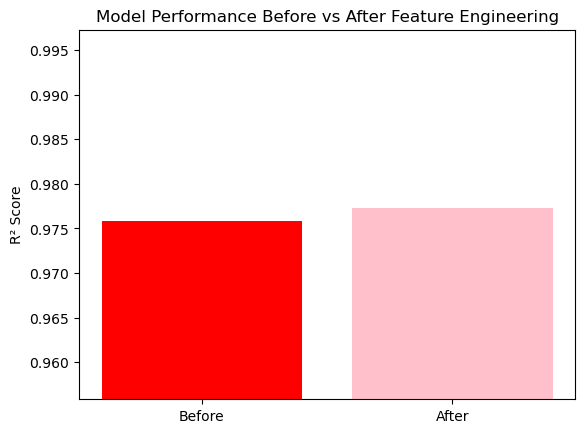

In [61]:
# Visualize how model performance improved after adding new features
plt.bar(['Before', 'After'], [r2_before, r2_after], color=['red', 'pink'])
plt.title('Model Performance Before vs After Feature Engineering')
plt.ylabel('R² Score')
plt.ylim(min(r2_before, r2_after) - 0.02, max(r2_before, r2_after) + 0.02)  # zooms in
plt.show()

In [65]:
# TASK 2: Model Comparison and Tuning

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define the two models to compare
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

In [69]:
# Evaluate each model using cross-validation
results = []

for name, model in models.items():
    scores = cross_val_score(model, Xa_train, y_train, cv=5, scoring='r2') # 5-fold cross validation
    results.append({'Model': name, 'R² Mean': scores.mean(), 'R² Std': scores.std()})

# Display cross-validation results
cv_results = pd.DataFrame(results)
cv_results

,Model,R² Mean,R² Std
0,Decision Tree,0.926994,0.003309
1,Linear Regression,0.929374,0.001320


In [75]:
 # Evaluate Linear Regression and Decision Tree on the test set

# Train and predict with Linear Regression
lr_model = models['Linear Regression']  # get Linear Regression from models dictionary
lr_model.fit(Xa_train, y_train)
y_pred_lr = lr_model.predict(Xa_test)

# Train and predict with a default Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(Xa_train, y_train)
y_pred_tree = tree_model.predict(Xa_test)

# Calculate R² score and Mean Squared Error for both models
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Create a summary table comparing model performance
summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'R² Score': [r2_lr, r2_tree],
    'Mean Squared Error': [mse_lr, mse_tree]
})

# Display the results
summary

,Model,R² Score,Mean Squared Error
0,Linear Regression,0.928905,3.306476
1,Decision Tree,0.932773,3.126579


In [77]:
# TASK 3: Model Explainability
# Check which features have the most influence on the predictions

# Decision Tree 
# Get feature importance values from the trained Decision Tree
dt_importances = tree_model.feature_importances_
features = Xa_train.columns

# Sort features by importance (highest first) and take the top 3
dt_indices = np.argsort(dt_importances)[::-1]
dt_top_features = features[dt_indices][:3]
dt_top_values = dt_importances[dt_indices][:3]

# Print the top 3 features for Decision Tree
print("Decision Tree - Top 3 features influencing predictions:")
for i in range(3):
    print(f"{i+1}. {dt_top_features[i]} ({dt_top_values[i]:.3f})")

# Linear Regression 
# Get coefficients from the trained Linear Regression model
lr_coefficients = pd.DataFrame({
    'Feature': Xa_train.columns,
    'Coefficient': lr_model.coef_
})

# Sort by absolute value to find the strongest predictors
lr_coefficients['Abs'] = lr_coefficients['Coefficient'].abs()
lr_coefficients = lr_coefficients.sort_values(by='Abs', ascending=False)

# Print the top 3 features for Linear Regression
print("\nLinear Regression - Top 3 features influencing predictions:")
for i in range(3):
    print(f"{i+1}. {lr_coefficients.iloc[i]['Feature']} ({lr_coefficients.iloc[i]['Coefficient']:.3f})")

Decision Tree - Top 3 features influencing predictions:
1. Reactions (0.671)
2. Potential (0.089)
3. BallControl (0.056)

Linear Regression - Top 3 features influencing predictions:
1. Skill Moves (0.836)
2. International Reputation (0.579)
3. Age (0.557)


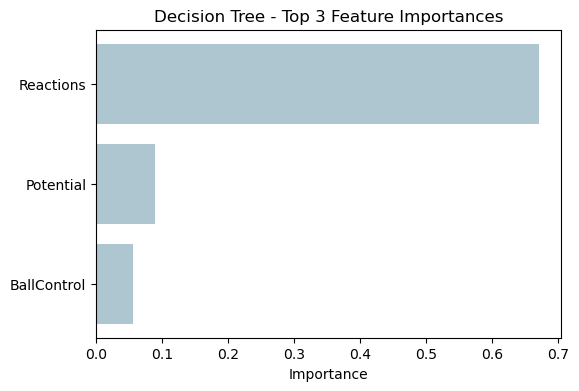

In [81]:
# Bar chart - Decision Tree
features = Xa_train.columns
importances = tree_model.feature_importances_

# Get top 3 features
top3_idx = importances.argsort()[::-1][:3]
top3_features = features[top3_idx]
top3_values = importances[top3_idx]

plt.figure(figsize=(6,4))
plt.barh(top3_features[::-1], top3_values[::-1], color='#AEC6CF')  
plt.xlabel("Importance")
plt.title("Decision Tree - Top 3 Feature Importances")
plt.show()

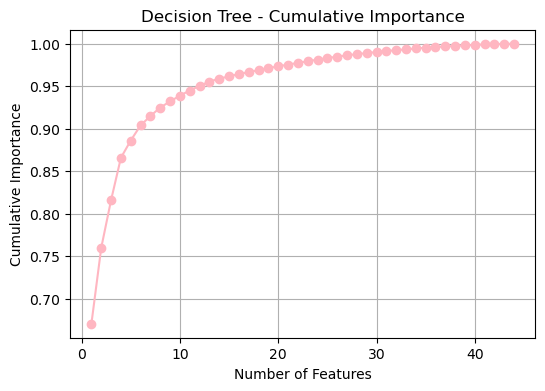

In [83]:
# Line chart - Decision Tree
importances = tree_model.feature_importances_
sorted_imp = np.sort(importances)[::-1]
cumulative = np.cumsum(sorted_imp)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative)+1), cumulative, marker='o', color='#FFB6C1')  
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.title("Decision Tree - Cumulative Importance")
plt.grid(True)
plt.show()

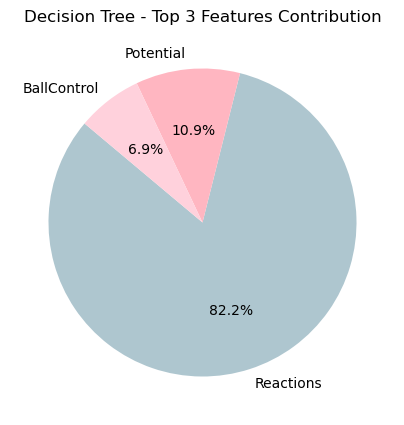

In [85]:
# Pie chart - Decision Tree
features = Xa_train.columns
importances = tree_model.feature_importances_

top3_idx = importances.argsort()[::-1][:3]
top3_features = features[top3_idx]
top3_values = importances[top3_idx]

plt.figure(figsize=(5,5))
plt.pie(top3_values, labels=top3_features, autopct='%1.1f%%',
        colors=['#AEC6CF','#FFB6C1','#FFD1DC'], startangle=140)
plt.title("Decision Tree - Top 3 Features Contribution")
plt.show()

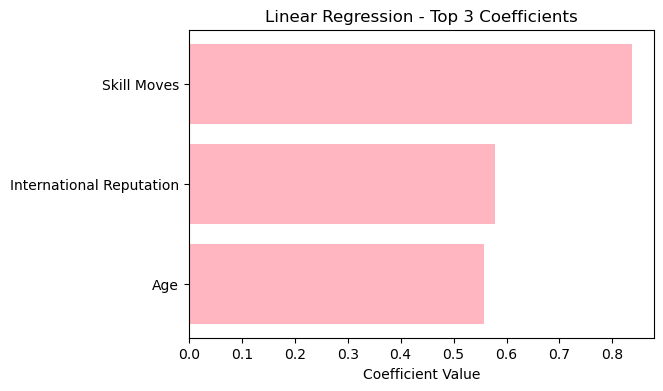

In [87]:
# Bar chart - Linear Regression
coeff = lr_model.coef_
features = Xa_train.columns

# Get top 3 by absolute value
abs_coeff = np.abs(coeff)
top3_idx = abs_coeff.argsort()[::-1][:3]
top3_features = features[top3_idx]
top3_values = coeff[top3_idx]

plt.figure(figsize=(6,4))
plt.barh(top3_features[::-1], top3_values[::-1], color='#FFB6C1')  # pastel pink
plt.xlabel("Coefficient Value")
plt.title("Linear Regression - Top 3 Coefficients")
plt.show()

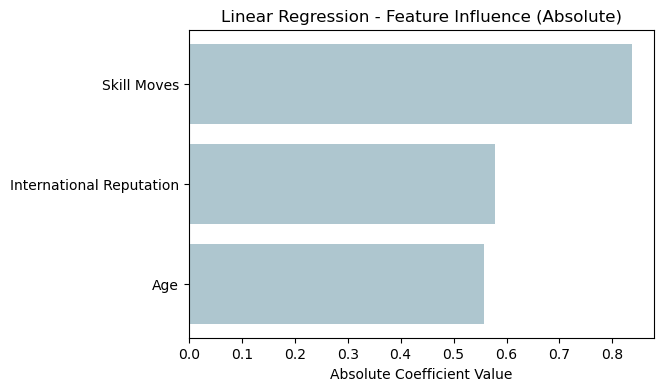

In [89]:
# Bar chart - Linear Regression
coeff = lr_model.coef_
features = Xa_train.columns

abs_coeff = np.abs(coeff)
top3_idx = abs_coeff.argsort()[::-1][:3]
top3_features = features[top3_idx]
top3_values = abs_coeff[top3_idx]

plt.figure(figsize=(6,4))
plt.barh(top3_features[::-1], top3_values[::-1], color='#AEC6CF')  # pastel blue
plt.xlabel("Absolute Coefficient Value")
plt.title("Linear Regression - Feature Influence (Absolute)")
plt.show()

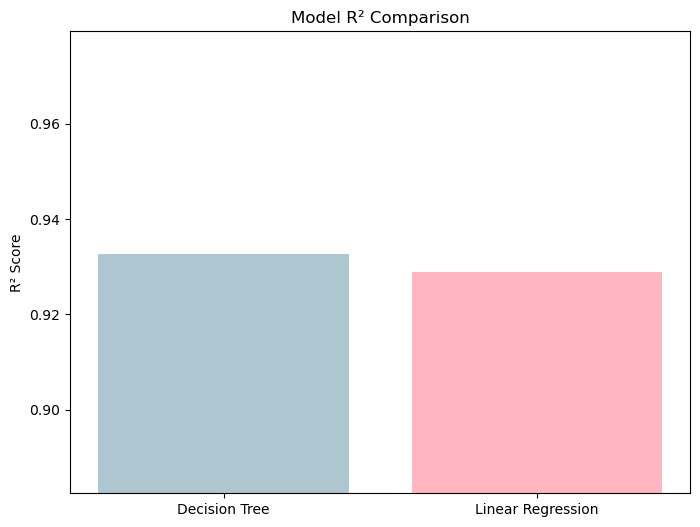

In [98]:
# Task 4 - Comparing multiple algorithms using line and bar charts


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Bar chart, R² of each model 
models = ['Decision Tree', 'Linear Regression']
r2_scores = [r2_tree, r2_lr]

plt.figure(figsize=(8,6))  
plt.bar(models, r2_scores, color=['#AEC6CF','#FFB6C1'])  

# Zoom in on the range where both values lie to exaggerate difference
plt.ylim(min(r2_scores)*0.95, max(r2_scores)*1.05)

plt.ylabel("R² Score")
plt.title("Model R² Comparison")
plt.show()


This chart shows how well each model predicts the target "Overall".
Taller bars mean the model is better and fits the data more accurately. The Decision Tree has a better $R^2$ score.

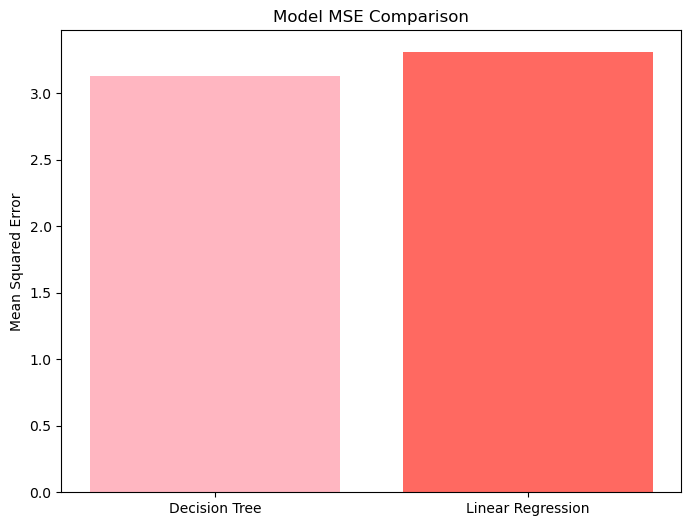

In [103]:
# Bar chart, MSE of each model

models = ['Decision Tree', 'Linear Regression']
mses = [mse_tree, mse_lr]

plt.figure(figsize=(8,6))
plt.bar(models, mses, color=['#FFB6C1','#FF6961'])  
plt.ylabel("Mean Squared Error")
plt.title("Model MSE Comparison")
plt.show()

This chart shows the Mean Squared Error for each model.  
Lower bars mean the model makes smaller mistakes when predicting "Overall".  
We can see that the Decision Tree makes fewer errors than Linear Regression.

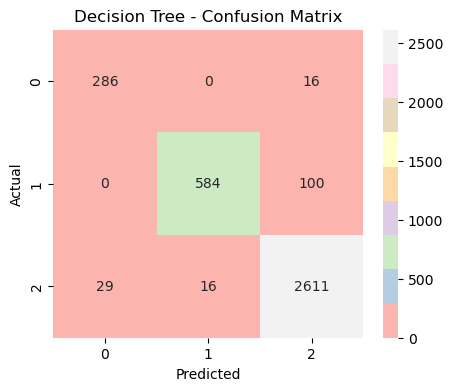

In [162]:
# Convert Overall to classes just for confusion matrix

bins = [0, 60, 75, 100]
labels = ['Low', 'Medium', 'High']
df['Overall_class_temp'] = pd.cut(df['Overall'], bins=bins, labels=labels)
y_class = df['Overall_class_temp']

# Split for testing
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_after, y_class, test_size=0.2, random_state=42
)

# Predict with Decision Tree and convert to classes
y_pred_class = pd.cut(model_after.predict(X_test_class), bins=bins, labels=labels)

# Confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Save the confusion matrix as a PNG before showing it
plt.savefig(r"C:\Users\USER\Documents\AI LAB - GROUP 5 CSC 309\confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

We had to convert "Overall" into classes of Low, Medium, and High because a confusion matrix cannot use continuous numbers.  
Low is from 0 to 60, Medium is from 61 to 75, and High is from 76 to 100.  
The confusion matrix shows how often the model predicted the right class (diagonal numbers) and where it made mistakes (off-diagonal numbers).

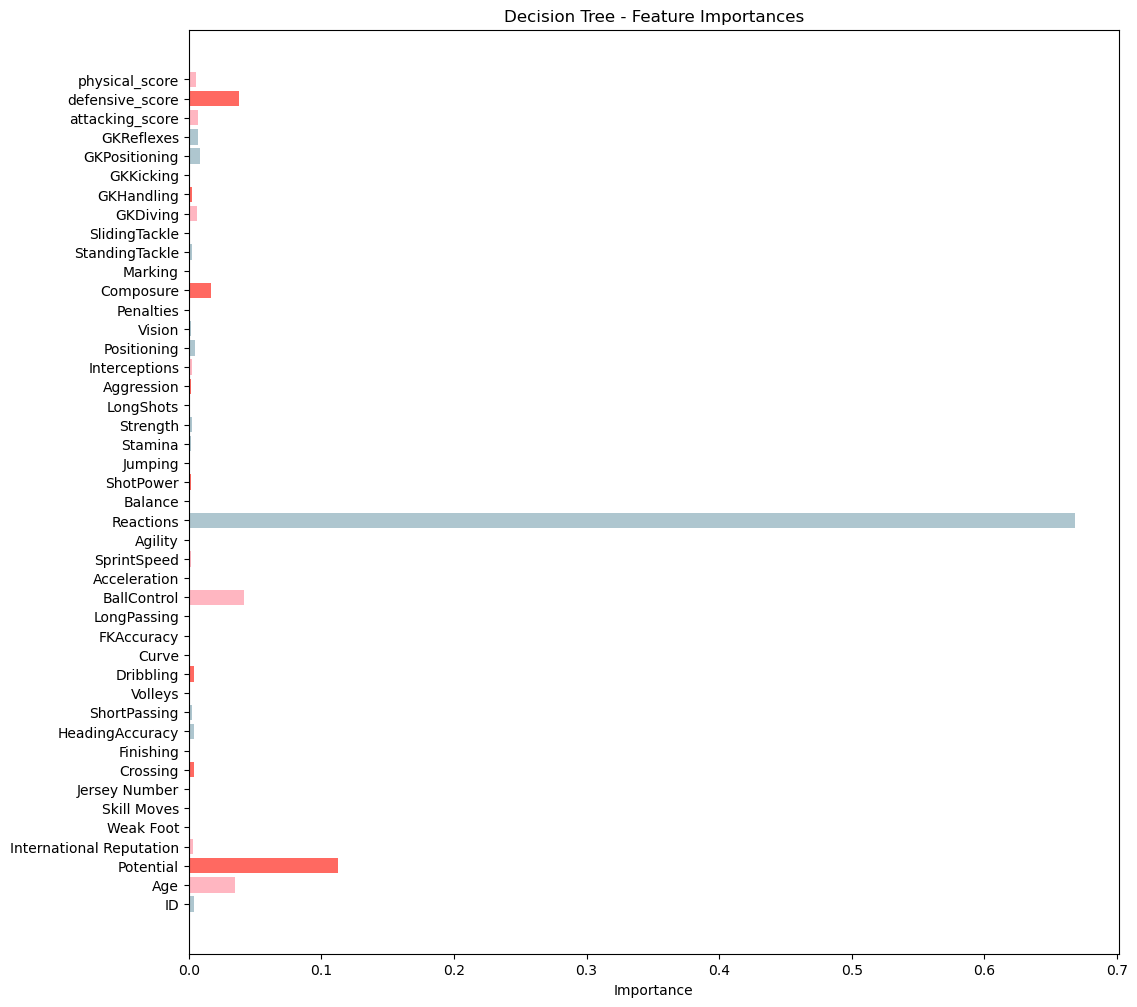

In [117]:
# Bar chart showing importance of all features 
importances = model_after.feature_importances_
features = X_after.columns  

plt.figure(figsize=(12,12))  
plt.barh(features, importances, color=['#AEC6CF','#FFB6C1','#FF6961','#FFB6C1','#AEC6CF']* (len(features)//5 +1))
plt.xlabel("Importance")
plt.title("Decision Tree - Feature Importances")
plt.show()

This chart shows how much the Decision Tree model cares about all the features we used.  
Longer bars mean the model thinks that feature is more important for predicting "Overall".  


In [128]:
# Save the cleaned and feature-engineered dataset

file_path = r"C:\Users\USER\Documents\AI LAB - GROUP 5 CSC 309\processed_data.csv"

df.to_csv(file_path, index=False)

print(f"Processed dataset saved to: {file_path}")

Processed dataset saved to: C:\Users\USER\Documents\AI LAB - GROUP 5 CSC 309\processed_data.csv


In [148]:
# Comparison Table Showing Model Performance Metrics
from sklearn.metrics import classification_report
import pandas as pd

# Use the predicted and actual classes from the Decision Tree confusion matrix
# y_test_class = actual classes
# y_pred_dt = predicted classes

# Generate classification metrics
report = classification_report(y_test_class, y_pred_dt, output_dict=True)

# Convert to DataFrame for a nice table
comparison_table = pd.DataFrame(report).transpose()

# Round numbers to 2 decimal places to make it cleaner
comparison_table = comparison_table.round(2)

# Display the table
comparison_table



,precision,recall,f1-score,support
High,0.91,0.89,0.90,302.00
Low,0.85,0.85,0.85,684.00
Medium,0.95,0.95,0.95,2656.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.90,0.90,0.90,3642.00
weighted avg,0.93,0.93,0.93,3642.00


In [152]:
# Save the comparison table as a CSV file
comparison_table.to_csv(r"C:\Users\USER\Documents\AI LAB - GROUP 5 CSC 309\PerformanceMetrics.csv", index=True)

In [158]:
# Save confusion matrix visualization as PNG
import matplotlib.pyplot as plt
import os

save_path = r"C:\Users\USER\Documents\AI LAB - GROUP 5 CSC 309"
os.makedirs(save_path, exist_ok=True)

plt.figure(1)
plt.savefig(os.path.join(save_path, "ConfusionMatrix_DecisionTree.png"), bbox_inches='tight')

print("Confusion matrix saved as PNG")

Confusion matrix saved as PNG


<Figure size 640x480 with 0 Axes>